# REPORTE 7

- Con Luis Felipe Acosta (20143350)

## PARTE LECTURA

La relevancia del ambiente de crianza y desarrollo de las personas se puede evidenciar en sus decisiones y el desenvolvimiento que tendrán en un futuro. Sosteniendo esta premisa, los  Chetty, Nathaniel Hendren y Lawrence Katz efectuaron un estudio a largo plazo para probar dos hipótesis. La primera hipótesis sostenía que el mudarse a un área "menos pobre" favorecía los resultados económicos -en el futuro- de los niños. La segunda hipótesis sostenía que las ganancias de mudarse a un área menos pobre disminuía con la edad del niño. En este sentido, el presente artículo buscó investigar el impacto del entorno socioeconómico en los niños menores de 18 años tras una mudanza a zonas de vivienda menos pobres. Por lo mismo, el desarrollo de este estudio se hizo a 4604 familias de bajos ingresos, con hijos y que residían en viviendas públicas o de la Sección 8. Para esta investigación se crearon 3 grupos: el grupo experimental al cual se les entregaron vouchers y se les asignó la nueva vivienda a zonas con un menor porcentaje de pobreza; el grupo de la Sección 8 al cual se le asignaron vouchers pero no se les indicó la nueva vivienda; y el grupo control al cual solo se les brindó mas que una asesoría sobre cómo efectuar la mudanza. En este sentido la pregunta tentativa del artículo podría ser: ¿Tiene algún efecto exponer a los niños a mejores barrios? o ¿Cómo el tipo de vecindario determinado por el nivel socioeconómico tiene algún impacto en los ingresos futuros de un niño?

Una fortaleza del artículo se encuentra en la cantidad de variables que se tuvieron en cuenta para el estudio, entre estas se encuentran variables de diversos enfoques de las ciencias sociales; entre estas variables se encuentra el ingreso personal, el ingreso familiar, la asistencia universitaria, la calidad universitaria, las características del barrio en la edad adulta, estado civil y fertilidad y la declaración de impuestos e impuestos pagados. Como se puede apreciar, la cantidad de variables a tomar en cuenta y la selección de estas hacen que el estudio pueda responder mejor a la pregunta de investigación. Asimismo, se debe reconocer que las variables fueron diseñadas por los autores y no fueron de alguna data externa. En este sentido, se reconoce que los índices de medición de cada variable parecen ser muy adecuados y acertados, dando así más confianza al estudio. Por otro lado, una debilidad del artículo se encuentra en el tamaño de la muestra y en la flaqueza que tendrán los resultados para extrapolarlos a los casos de otros países. Si bien el estudio fue realizado en diferentes zonas, todas estas se encuentran en Estados Unidos. En este sentido, considero que se debió tomar en cuenta la marcada división cultural que hay en Estados Unidos y como esta se encuentra relacionada al sector urbano al que se pertenece. Con lo mencionado no se hace referencia a que el resto del mundo carezca de diferencias en sus diversas zonas urbanas; sino que, en la mayoría de Estados, estas diferencias no se encuentran tan marcadas o arraigadas o no son un factor tan determinante en el desarrollo de la persona.

El documento avanza a la pregunta de investigación debido a que entre sus hallazgos se encuentra que, efectivamente, el desarrollo de los de niños en diferentes zonas urbanas tiene un impacto o efecto significativo en los futuros resultados económicos del mismo. Además, también se reconoce que el nivel de significancia varia de acuerdo a la edad en la que el niño fue trasladado de vivienda. Asimismo, este hallazgo se fortalece con 
varios estudios anteriores que abarcaron el mismo topic.
 
Para poder avanzar a la pregunta de investigación se pueden tomar en cuenta un articulo: "Desigualdades en el logro académico y reproducción cultural en Argentina"; dicho documento analiza la importancia del capital económico y cultural en los logros académicos y es relevante debido a que añade una variable cultural que puede tener significancia en las decisiones o prioridades de la persona -como la diferencia que le dan a la importancia de la vida acádemica-; como se mencionó, los barrios estadounidenses y sus diferencias están muy marcadas por la cultura, por lo que aislar esta variable podría ser perjudicial para cualquier estudio sobre el tema. 


BIBLIOGRAFÍA
Chetty, R., Hendren, N., & Katz, L. F. (2016). The effects of exposure to better neighborhoods on children: New evidence from the moving to opportunity experiment. American Economic Review, 106(4), 855-902.

Cervini, R. (2002). Desigualdades en el logro académico y reproducción cultural en Argentina. Revista mexicana de investigación educativa, 7(16).

## PARTE DE PRÁCTICA

In [3]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

### Ploteo de Histogramas

Deben plotear la distribución de las notas para los tres grupos de manera separada. Revisen este link para ayudarse. Les recomiendo que utilicen la libreria seaborn porque es muy práctica para plotear gráficos por grupos. Hint de cómo crear una variable dummy.

- face-to-face
- online lessons
- blended format

1. Sus gráficos deben tener correctamente las legendas y los labels

In [4]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [5]:
data2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face"
 )))
data2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [7]:
data3 = pd.get_dummies(data2)
data3

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


Text(0.5, 1.0, 'Blended format')

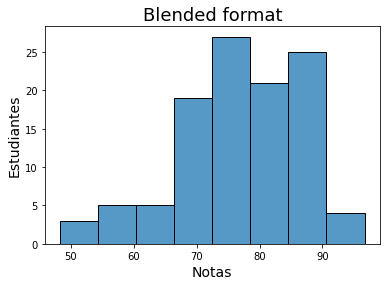

In [9]:
sns.histplot(data=data3[data3['class_format_blended']==1], x='falsexam')
plt.xlabel("Notas", fontsize=14)
plt.ylabel("Estudiantes", fontsize=14)
plt.title("Blended format", fontsize=18)

Text(0.5, 1.0, 'Face-to-face')

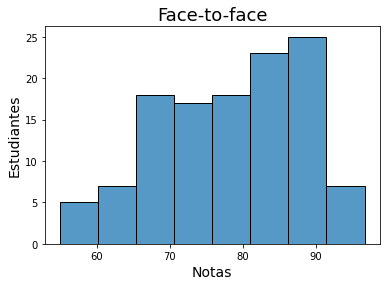

In [10]:
sns.histplot(data=data3[data3['class_format_face_to_face']==1], x='falsexam')
plt.xlabel("Notas", fontsize=14)
plt.ylabel("Estudiantes", fontsize=14)
plt.title("Face-to-face", fontsize=18)

Text(0.5, 1.0, 'Online lessons')

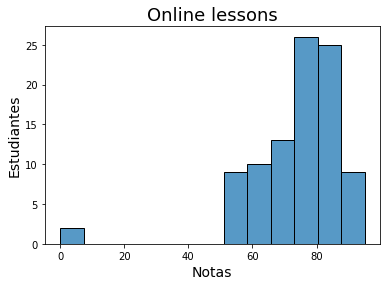

In [11]:
sns.histplot(data=data3[data3['class_format_online']==1], x='falsexam')
plt.xlabel("Notas", fontsize=14)
plt.ylabel("Estudiantes", fontsize=14)
plt.title("Online lessons", fontsize=18)

2. Expliquen qué diferencias encuentran entre los tres histogramas

Las diferencias encontradas encontradas en los tres histogramas revelan que hay una mayor variabilidad en las notas de los estudiantes que tienen clases presenciales y una menor variabilidad en las notas de los estudiantes que tienen online lesson.

### Difference in means estimator

Ahora solo se van a concentrar en los grupos face-to-face y online lessons. Para ello pueden seguir estos pasos:

1. Crear un nuevo dataset donde solo incluyan estos dos grupos

In [12]:
nvdataset = pd.DataFrame(data3, columns=['class_format_online', 'class_format_face_to_face', 'falsexam'])
nvdataset

,class_format_online,class_format_face_to_face,falsexam
0,0,1,63.29997
1,0,1,79.96000
2,0,0,83.37000
3,0,0,90.01994
4,1,0,83.30000
...,...,...,...
318,0,0,68.36000
319,1,0,70.05000
320,1,0,66.69000
321,1,0,83.29997


In [16]:
nvdataset2 = (nvdataset
 .assign(class_format_2 = np.select(
     [nvdataset["class_format_face_to_face"].astype(bool), nvdataset["class_format_online"].astype(bool)],
     ["face-to-face", "online"],
 )))
nvdataset2

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
2,0,0,83.37000,0
3,0,0,90.01994,0
4,1,0,83.30000,online
...,...,...,...,...
318,0,0,68.36000,0
319,1,0,70.05000,online
320,1,0,66.69000,online
321,1,0,83.29997,online


In [17]:
index = nvdataset2[(nvdataset2['class_format_2']=="0")].index

In [18]:
nvdataset3=nvdataset2.drop(index)
nvdataset3

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
4,1,0,83.30000,online
5,1,0,88.34996,online
7,0,1,90.00000,face-to-face
...,...,...,...,...
316,0,1,91.65000,face-to-face
317,0,1,84.99000,face-to-face
319,1,0,70.05000,online
320,1,0,66.69000,online


2. Calculan el promedio del grupo online lessons

3. Calculan el primdeio del grupo face-to-face

In [19]:
nvdataset3.groupby('class_format_online').mean()

,class_format_face_to_face,falsexam
class_format_online,,
0,1.0,78.547485
1,0.0,73.635263


- Ojo: 
    - 0: promedio del grupo face-to-face
    - 1: promedio del grupo online lessons

4. Toman la diferencia entre el valor encontrado en 2 y el valor en 3.

In [21]:
#Valor encontrado en 2: 73.635263
#Valor encontrado en 3: 78.547485
#Resultado:
73.635263-78.547485

-4.912222

¿Cuál es su interpretación del resultado encontrado?

Por los resultados, se puede evidenciar que el promedio del grupo face to face es mayor al promedio de notas del grupo que tiene online lessons.

### Difference in means estimator via linear regression 

Ahora van a utilizar una regresión lineal para encontrar lo mismo que en el apartado de arriba. Pueden seguir estos pasos

- Deben crear una variable dummy que tome el valor de 1 cuando el tipo de clase sea online y 0 cuando sea face to face.

In [22]:
data3 = (nvdataset3
 .assign(class_format_2 = np.select(
     [nvdataset3["class_format_face_to_face"].astype(bool), nvdataset3["class_format_online"].astype(bool)],
     ["0", "1"]
 )))
data3

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,0
1,0,1,79.96000,0
4,1,0,83.30000,1
5,1,0,88.34996,1
7,0,1,90.00000,0
...,...,...,...,...
316,0,1,91.65000,0
317,0,1,84.99000,0
319,1,0,70.05000,1
320,1,0,66.69000,1


In [23]:
pd.get_dummies(data3)

,class_format_online,class_format_face_to_face,falsexam,class_format_2_0,class_format_2_1
0,0,1,63.29997,1,0
1,0,1,79.96000,1,0
4,1,0,83.30000,0,1
5,1,0,88.34996,0,1
7,0,1,90.00000,1,0
...,...,...,...,...,...
316,0,1,91.65000,1,0
317,0,1,84.99000,1,0
319,1,0,70.05000,0,1
320,1,0,66.69000,0,1


- Luego deben realizar una regresion lineal donde Y = Las notas, T = Dummy creada para el tipo de clase.

- Esta regresion es de la siguente manera Y = beta_0 + beta_1*T + e. El valor que encuentren para beta_1 es el average treatment effect que debería ser igual al Difference-in-means estimator encontrado arriba.

In [24]:
ols_reg = sm.OLS.from_formula("falsexam ~ class_format_2", 
              data = nvdataset3).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        09:21:33   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   78.5475      1.113     70.563      0.000      76.353      80.742
class_format_2[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Cuál es su interpretación del resultado encontrado?

Tras la regresión lineal, se puede encontrar dos resultados principales. Primero, el Rsquared demuestra que el modelo diseñado puede explicar el 39% de la variable dependiente, lo cual es significativo si se toma en cuenta que ,a regresión solo toma en cuenta a una variable de la data. Por otro lado, para el segundo punto se debe tomar en cuenta que la variable independiente es dicotómica y por esto, para la regresión se ha usado  "Face-to-Face" como categoría de referencia. En este sentido, analizando la variable independiente -con la categoría de asistencia virtual- se puede observar que esta presenta una relación inversa o negativa con la variable dependiente, por lo que se reconoce que asistir virtualmente, en contraste con asistir presencialmente, tiene un efecto negativo en las notas del estudiante.